# **YULU CASE STUDY ANALYSIS**
### **Name : Asit Nayak**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/bike_sharing.txt")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Problem Statement :

To understand factors and finding those which affect the demand of the shared electric cycles in Indian market. Which all variables can be used to predict the demand and how important those variable are in the prediction process.

In [ ]:
print(f"Shape of data : {df.shape}")
print("\nData types and missing value counts of columns :")
print("-"*51)
pd.DataFrame({'Columns': df.columns, 'DataTypes': df.dtypes.to_list(), 'MissingValues': df.isna().sum().to_list()})

Shape of data : (10886, 12)

Data types and missing value counts of columns :
---------------------------------------------------


,Columns,DataTypes,MissingValues
0,datetime,object,0
1,season,int64,0
2,holiday,int64,0
3,workingday,int64,0
4,weather,int64,0
5,temp,float64,0
6,atemp,float64,0
7,humidity,int64,0
8,windspeed,float64,0
9,casual,int64,0


In [ ]:
# Checking duplicate values

df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- Apart from date columns, all columns are numerical columns and those columns that has data falling into categories, are already categorized into numerical catedories.

- There are no missing values in any column of the data.
- There are no duplicate records in data.

- Temperature is ranging from a minimum of 0.8 to max of 41 with average od 20 degree celcius. Mean and median both are 20 degrees.
- Feels like temperature is with sync with temperature with 3-4 degrees greater for all ranges (min, max, mean, median).
- Humidity is varying from a range of 0 to 100, with a mean of 61 and median of 62. Mean and medians are near to each other.
- Windspeed is ranging from 0 to 57 with mean and median both of 12.
- Count of bookings is ranging from 1 to 977 bookings in one hour, with a mean of 191 and median of 145.

In [ ]:
# Changing type of datetime column, and extracting year, month, date and hour
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [ ]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


# Univariate Analysis

In [ ]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
df.year.value_counts()

,count
year,
2012,5464
2011,5422


In [ ]:
df.month.value_counts().sort_index()

,count
month,
1,884
2,901
3,901
4,909
5,912
6,912
7,912
8,912
9,909


In [ ]:
df.day.value_counts().sort_index()

,count
day,
1,575
2,573
3,573
4,574
5,575
6,572
7,574
8,574
9,575


In [ ]:
df.day.max()

19

In [ ]:
df[df.day == 19]['datetime'].head(10)

,datetime
408,2011-01-19 00:00:00
409,2011-01-19 01:00:00
410,2011-01-19 02:00:00
411,2011-01-19 04:00:00
412,2011-01-19 05:00:00
413,2011-01-19 06:00:00
414,2011-01-19 07:00:00
415,2011-01-19 08:00:00
416,2011-01-19 09:00:00
417,2011-01-19 10:00:00


In [ ]:
all_dates = pd.date_range(df['datetime'].min(), df['datetime'].max(), freq='D')
# print(len(all_dates))
booking_date = np.array(df['datetime'].dt.date.values, dtype='datetime64')
# print(len(booking_date))
no_booking_days = [i for i in all_dates if i not in booking_date]
print(f"Number of non booking days : {len(no_booking_days)}")

Number of non booking days : 263


In [ ]:
print(df.day.max())

19


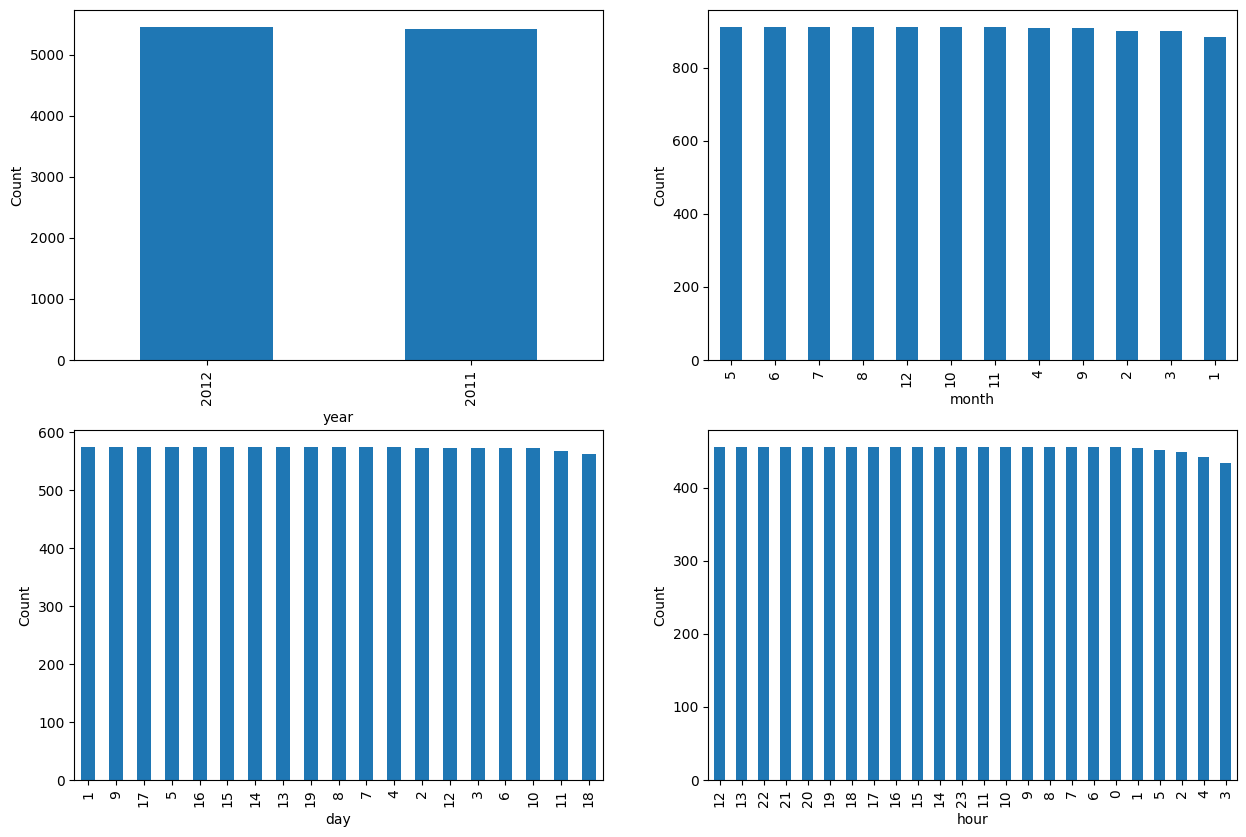

In [ ]:
columns = ['year','month','day','hour']

fig, axes = plt.subplots(2,2 , figsize=(15, 10))
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df[col].value_counts().plot(kind='bar', ax=ax)
    # ax.set_title(f'Distribution of {col}')
    # ax.set_xlabel(col)
    ax.set_ylabel('Count')

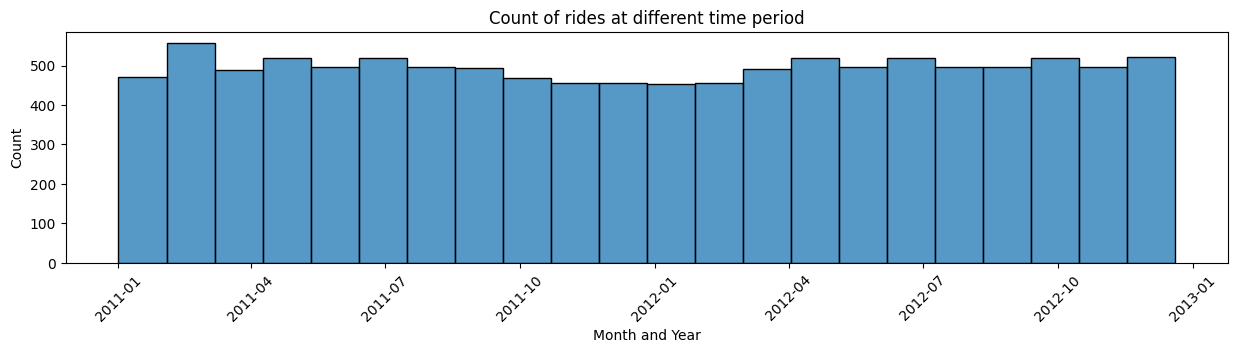

In [ ]:
plt.figure(figsize=(15,3))
plt.title("Count of rides at different time period")
sns.histplot(df['datetime'])
plt.xlabel("Month and Year")
plt.xticks(rotation=45)
plt.show()


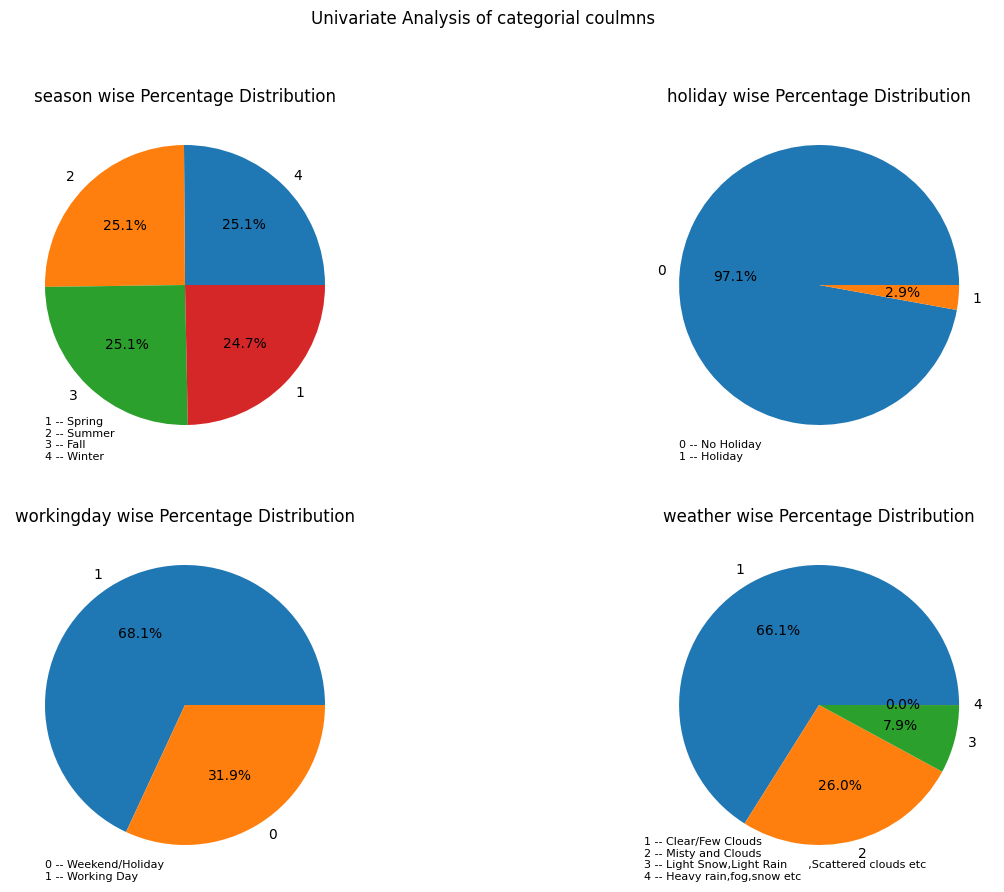

In [ ]:
categorical_columns = ['season','holiday','workingday','weather']

fig, axes = plt.subplots(2,2, figsize=(15, 10))
axes = axes.flatten()
i=1
plt.suptitle("Univariate Analysis of categorial coulmns")
for ax, col in zip(axes, categorical_columns):
    plt.subplot(2,2,i)
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().index,autopct='%1.1f%%')
    ax.set_title(f'{col} wise Percentage Distribution')
    if i==1:
      plt.annotate('1 -- Spring \n2 -- Summer \n3 -- Fall \n4 -- Winter',xy=(-1,-1.25),fontsize=8)
    elif i==2:
      plt.annotate('0 -- No Holiday \n1 -- Holiday',xy=(-1,-1.25),fontsize=8)
    elif i==3:
      plt.annotate('0 -- Weekend/Holiday \n1 -- Working Day',xy=(-1,-1.25),fontsize=8)
    elif i ==4:
      plt.annotate('1 -- Clear/Few Clouds\n2 -- Misty and Clouds \n3 -- Light Snow,Light Rain\
      ,Scattered clouds etc \n4 -- Heavy rain,fog,snow etc',xy=(-1.25,-1.25),fontsize=8)

    i += 1

**Analysis**
- We notice that no bookings were made after 19th of any month.
- Total of 263 days were passed without any booking.
- There was a small dip in bookings from 10-2011 till 03-2012, which went back to regular range of bookings. We can look for resons for that dip.
- There is a huge dip in number of bookings on holidays. (So generally working poeple are using the service)
- There is a huge dip in number of bookings on non-working days. (So generally working poeple are using the service)

*weather info :*
1. *Clear, Few clouds, partly cloudy, partly cloudy*
2. *Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist*
3. *Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds*
4. *Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*

- Maximum bookings were made on days with clear or few/partly cloudy days.
- Naturally number of bookings keep reducing as the weather worsens and almost no bookings were made on days with heavy rainfall and snow.

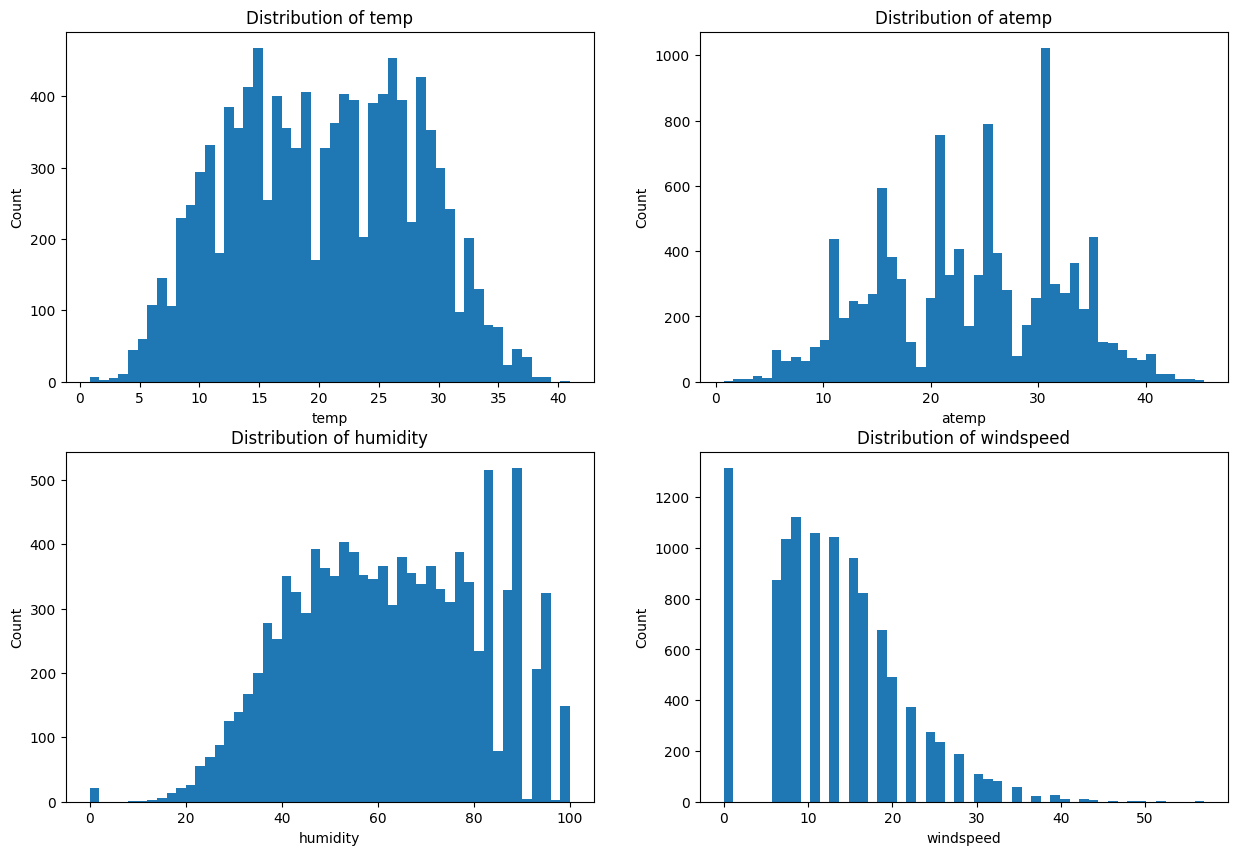

In [ ]:
continuous_columns = ['temp','atemp','humidity','windspeed']

fig, axes = plt.subplots(2,2, figsize=(15, 10))
axes = axes.flatten()
for ax, col in zip(axes, continuous_columns):
    df[col].plot(kind='hist', bins=50, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

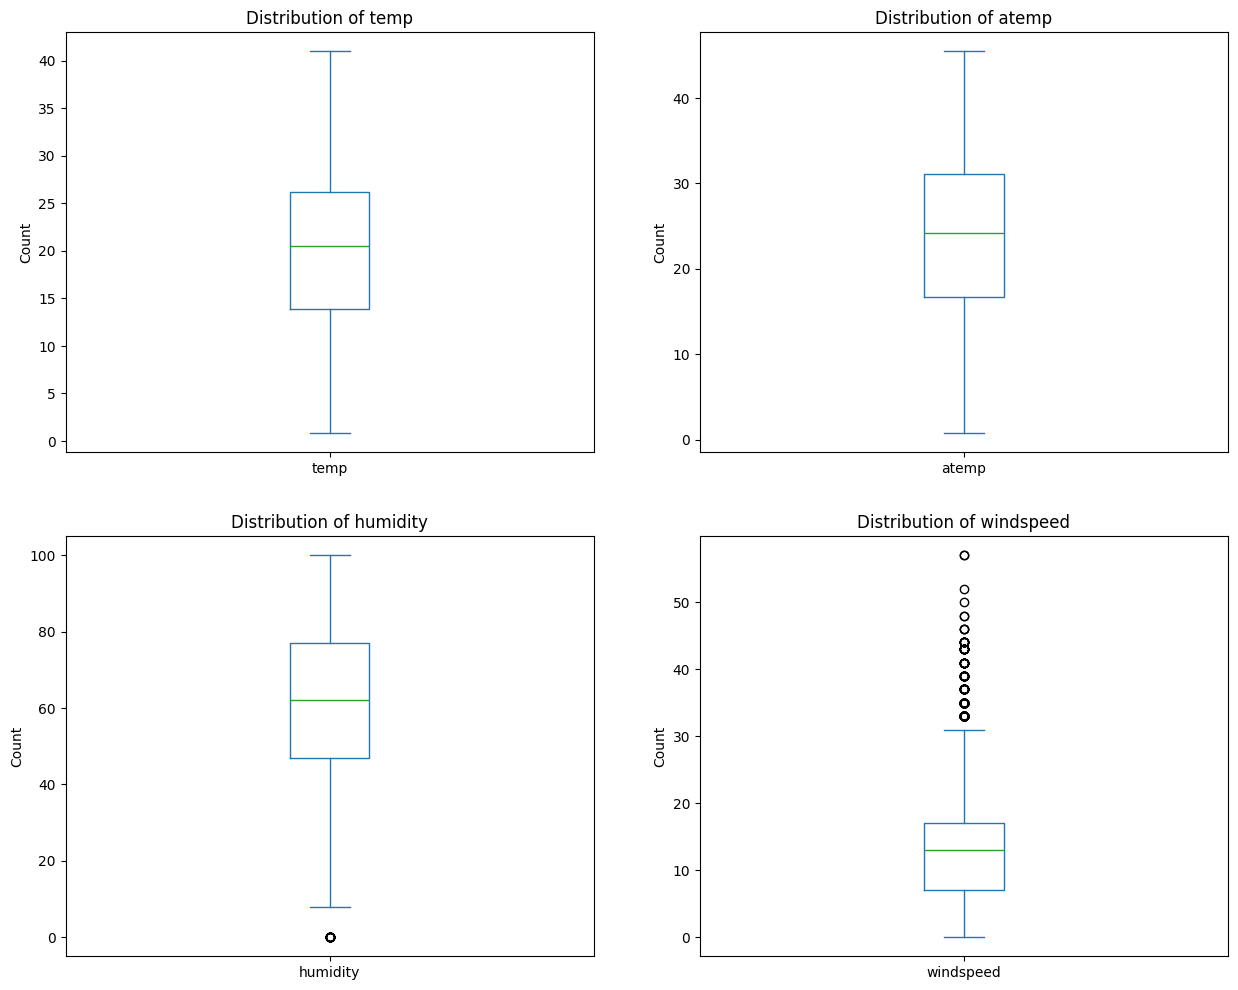

In [ ]:
continuous_columns = ['temp','atemp','humidity','windspeed']

fig, axes = plt.subplots(2,2, figsize=(15, 12))
axes = axes.flatten()
for ax, col in zip(axes, continuous_columns):
    df[col].plot(kind='box', ax=ax)
    ax.set_title(f'Distribution of {col}')
    # ax.set_xlabel(col)
    ax.set_ylabel('Count')

**Analysis :**

- Most of the booings were made wnen the temperature was between 10 to 35 degrees, which was also inferred from the previous histogram of weather.
- Temperature and temperature feels are almost similar apart from a near to constant difference between them. Since these two columns seem correlated, we can consider dropping the *'atemp'* column.
- Most of the bookings were made when the humid was between 30 to 90.
- Number of bookings started dropping after the windspeed crossed 20 and even dropped rapidly after the windspeed crossed 30.



In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

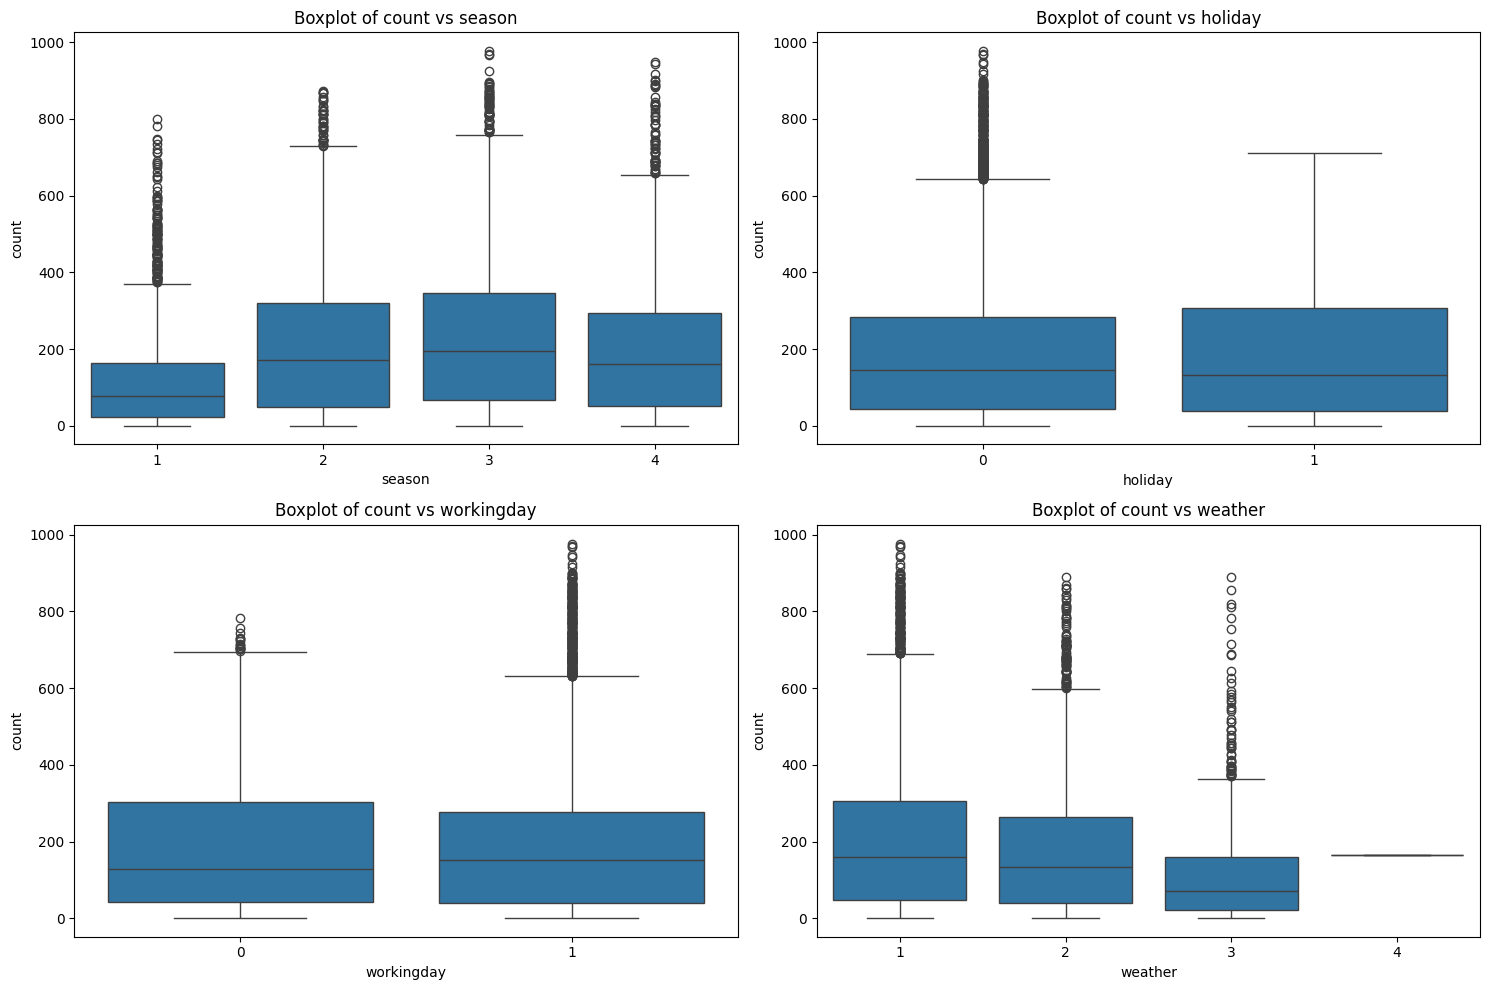

In [ ]:
# 1. Box Plots for Categorical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, y='count')
    plt.title(f'Boxplot of count vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

**Holiday** : Although the mean and median number of bookings per hour are near to each other, but we can clearly infer that the number of bookings spikes on non holidays.

**Working days** : Again the mean and median number of bookings per hour are near to each other, but we can clearly infer that the number of bookings spikes on non working days.

**Weather** : As we had previously noticed from the pie-charts, number of bookings keeps dropping as the weather conditions worsens.

**Season** : Surprisingly, the number of bookings is not picking up on spring season which should be one of the best time to ride outside. And surprisingly, the number of bookings in fall season is comparable with summers and winters.

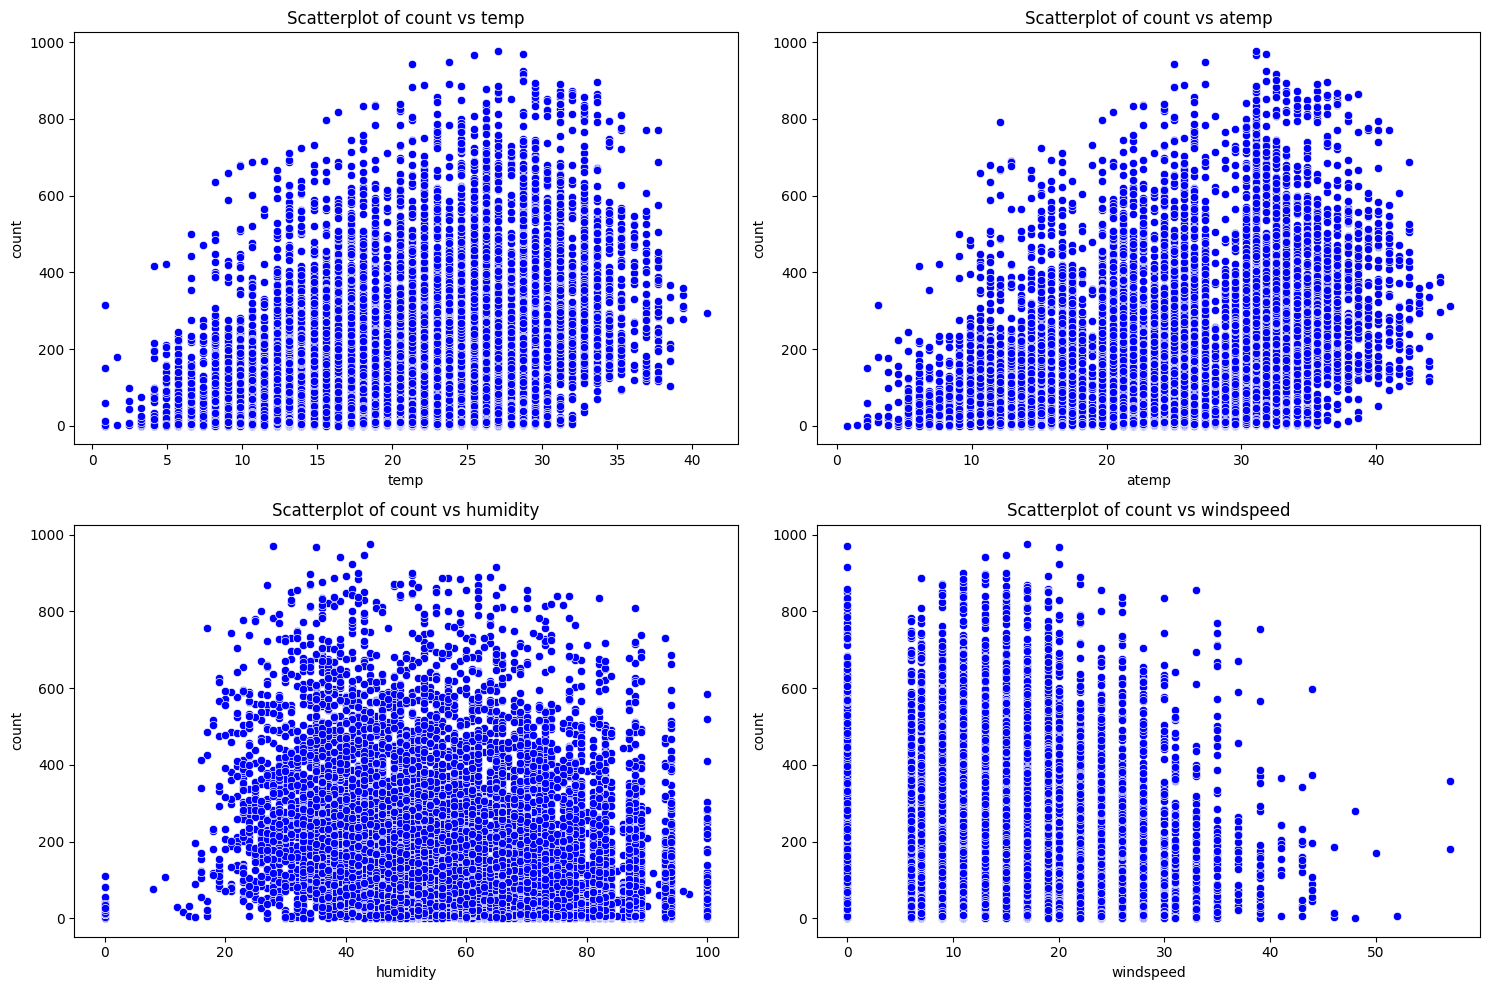

In [ ]:
# 2. Scatter Plots for Numerical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=feature, y='count', color='blue')
    plt.title(f'Scatterplot of count vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

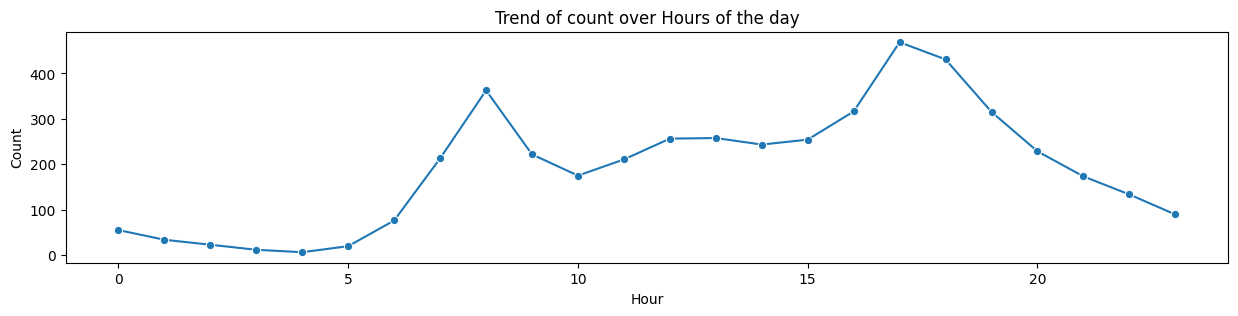

In [ ]:
# 3. Datetime Analysis
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
plt.figure(figsize=(15, 3))
sns.lineplot(data=df, x='hour', y='count', errorbar=None, marker='o')
plt.title('Trend of count over Hours of the day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

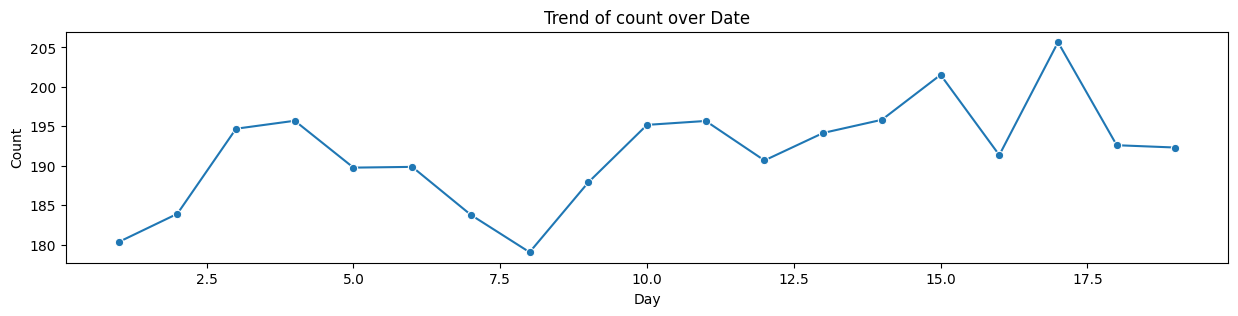

In [ ]:
plt.figure(figsize=(15, 3))
sns.lineplot(data=df, x='day', y='count', errorbar=None, marker='o')
plt.title('Trend of count over Date')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

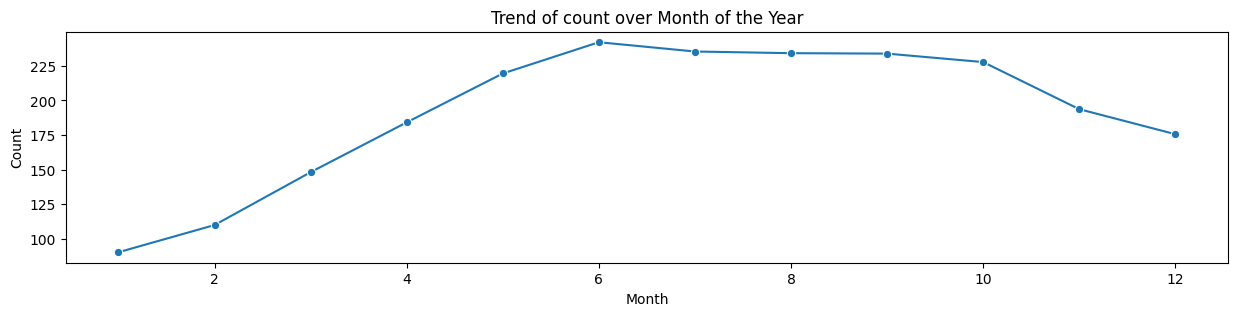

In [ ]:
plt.figure(figsize=(15, 3))
sns.lineplot(data=df, x='month', y='count', errorbar=None, marker='o')
plt.title('Trend of count over Month of the Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

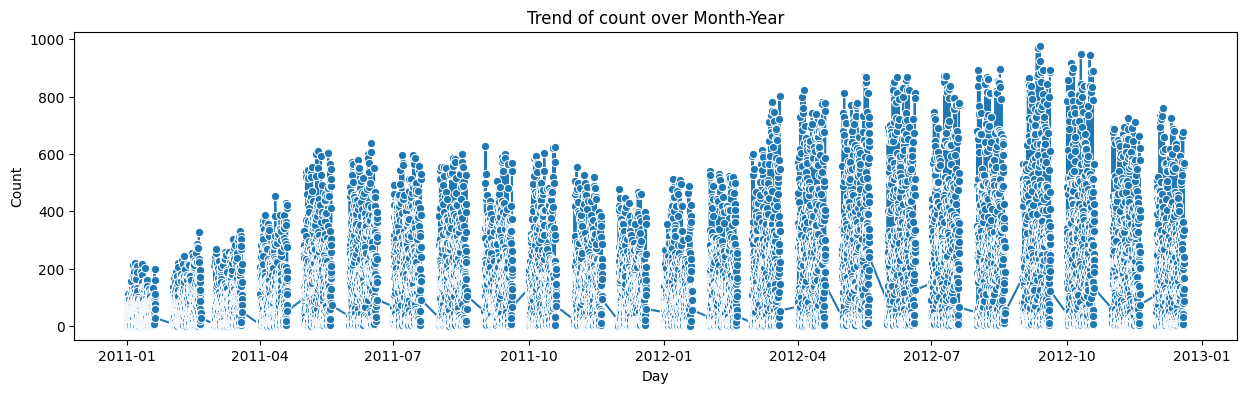

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='datetime', y='count', errorbar=None, marker='o')
plt.title('Trend of count over Month-Year')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**Analysis :**

- Overall business for Yulu has increaded from last year.
- But there is a dip in business during 11-2011 to 02-2012.
- In current situation, we can notice a similar dip in business after 10-2012. We need to find the cause of this dip in business.
- This similar inference can also be extracted from the 'Monthly Distribution of Bookings' graph.
- From the bookings distribution on basis of date of the month, we can notice that the bookings take a dip after the first week of every month.
- From the bookings distribution on basis of hour of a day, we can notice that the bookings dip from the mid night to morning 6 and start declining after 8 pm in the evening. Bookings remain consistent throughout the whole day, but spikes at 9 AM and 4 PM. Naturally this is the time people travel office, school and other institutions.

## **Finding Corelation between numerical features.**

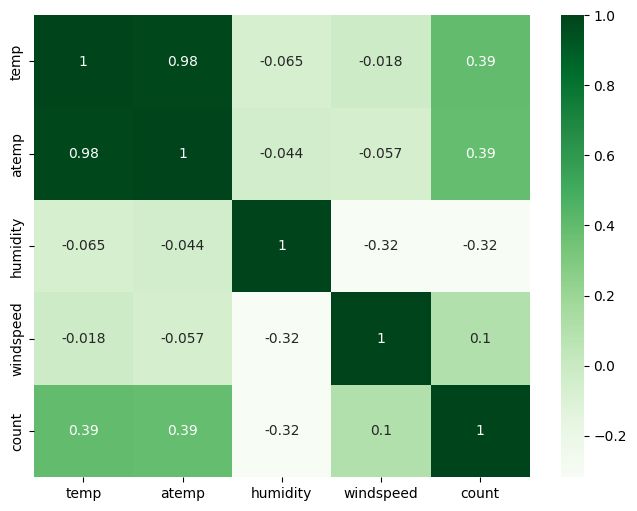

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(), annot=True, cmap="Greens")
plt.show()

**Analysis :**

- As we had already infered from above analysis, *temp* and *atemp* are highly correlated. We can remove *atemp* from data.
- We can notice a healthy correlation of *temp* with the label column, i.e the number of bookings.
- Humidity seems to be the least correlated variable with the dependent variable.

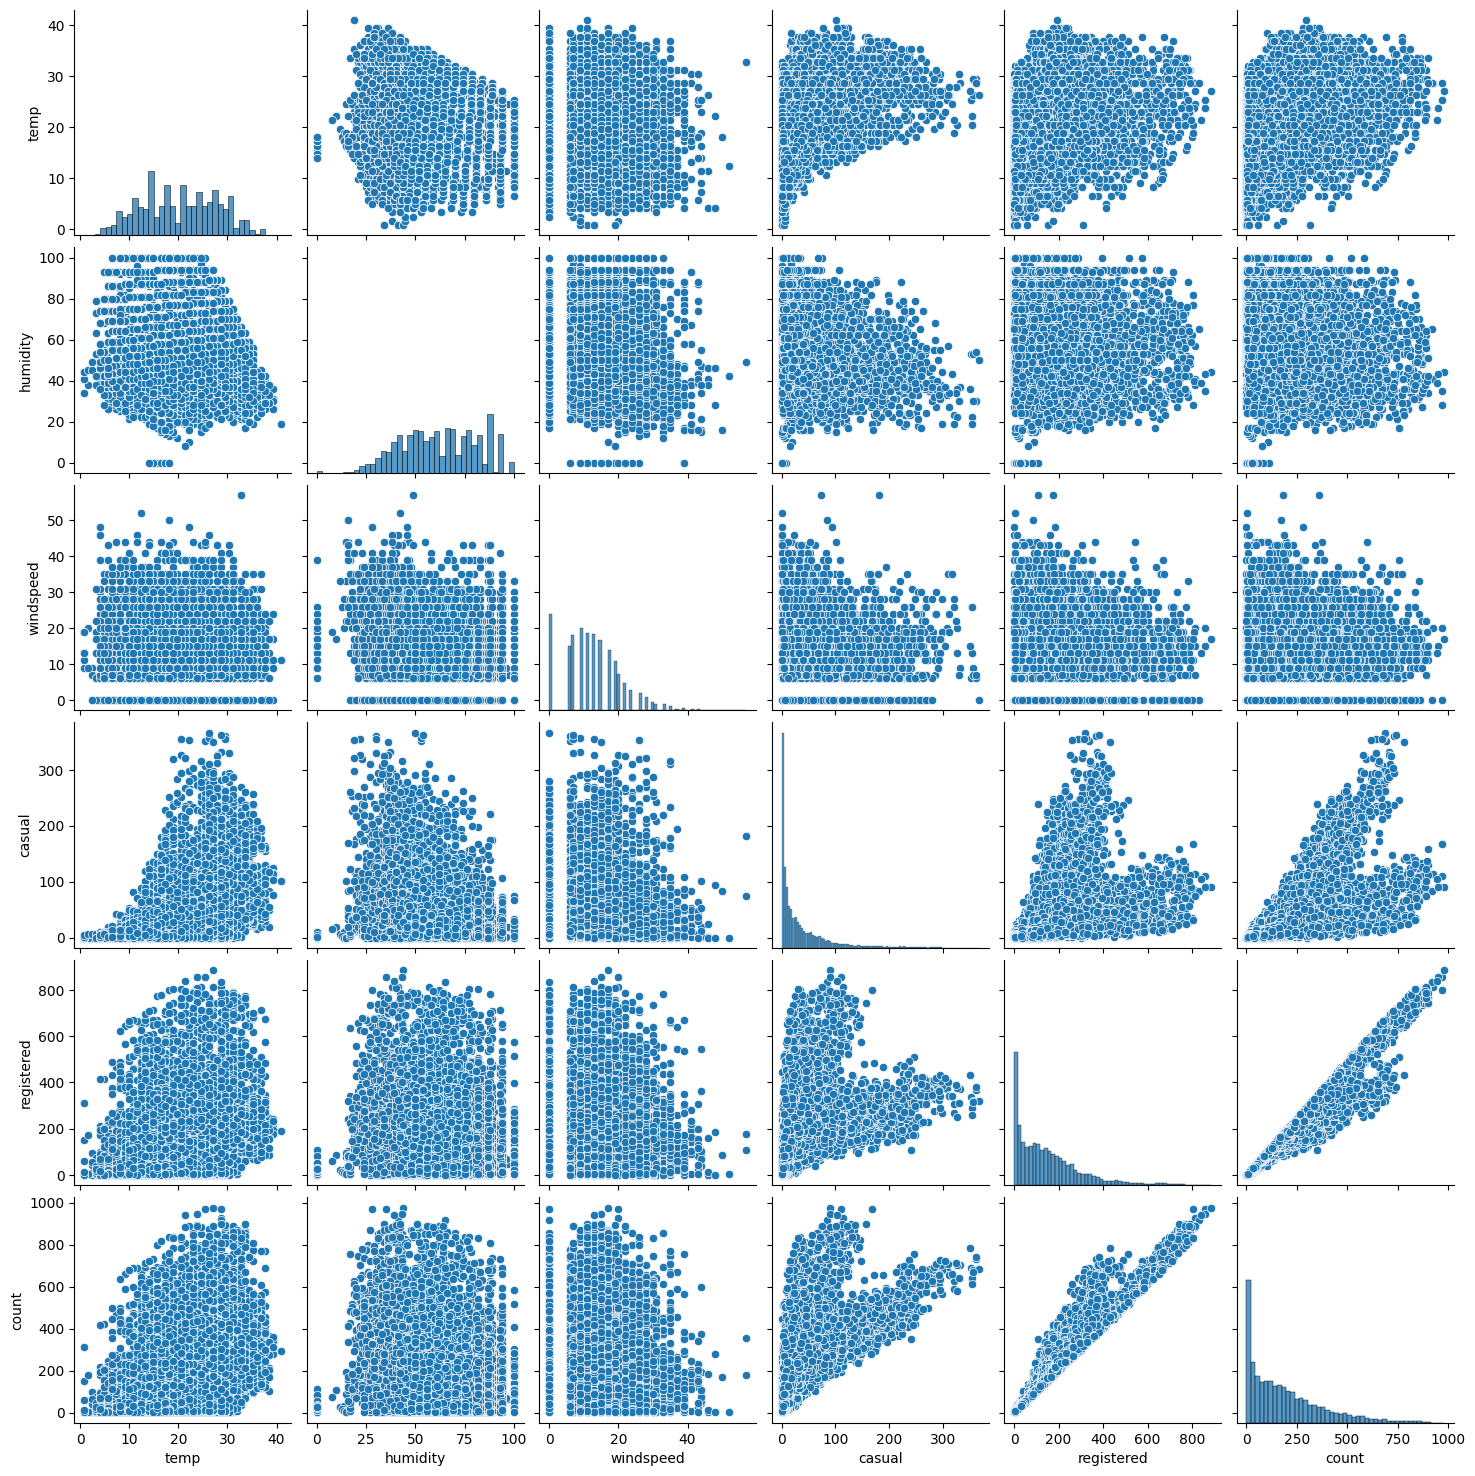

In [ ]:
# creating pair-plot

sns.pairplot(df.drop(columns=['atemp','hour','day','month','year','season','holiday','workingday','weather']))
plt.show()

**Analysis :**
- We can only notice a healthy correlation of our independent variable with temperature.


# Hypothisis Testing

### Finding out if there is any statistical significant difference between the number of rides on weekdays and weekend/holidays.

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
# separate the dataset based on category
riding_days = df[df['workingday'] == 1]['count']
non_riding_days = df[df['workingday'] == 0]['count']

# Finding mean and standard difference between bith groups
print(f"Riding Days : Mean = {riding_days.mean().round(2)}, Std. = {np.round(riding_days.std(),2)}")
print(f"Non riding Days : Mean = {non_riding_days.mean().round(2)}, Std. = {np.round(non_riding_days.std(),2)}")

Riding Days : Mean = 193.01, Std. = 184.51
Non riding Days : Mean = 188.51, Std. = 173.72


We can notice that the mean and variance of these two groups are near to each other.

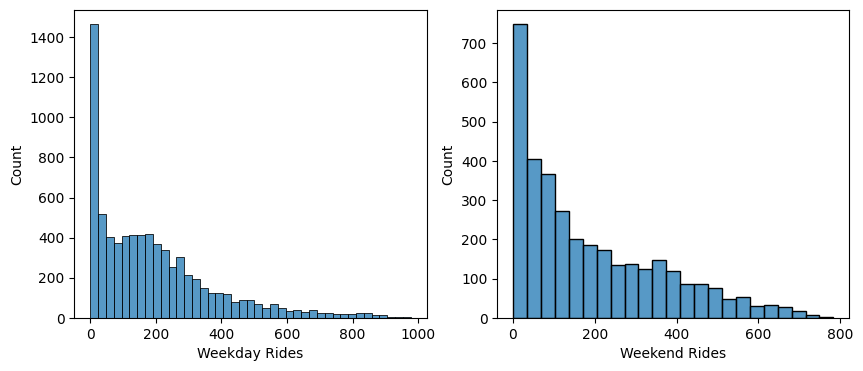

In [ ]:
# Normality check of both groups

# Using visual analysis
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(riding_days)
plt.xlabel("Weekday Rides")
plt.subplot(1,2,2)

sns.histplot(non_riding_days)
plt.xlabel("Weekend Rides")

plt.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind, shapiro, levene,\
f_oneway, kruskal, chi2_contingency, describe

<Figure size 600x600 with 0 Axes>

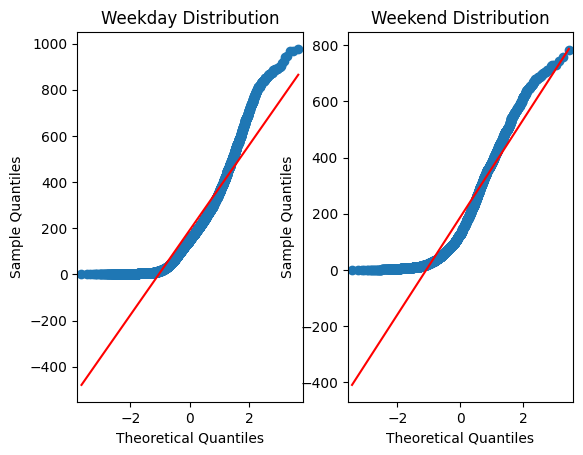

In [ ]:
# using QQplot

plt.figure(figsize=(6,6))
fig,ax=plt.subplots(1,2)
qqplot(riding_days,line='s',ax=ax[0])
ax[0].set_title('Weekday Distribution')

qqplot(non_riding_days,line='s',ax=ax[1])
ax[1].set_title('Weekend Distribution')

fig.show()

We can see data is not perfectly Gaussian but the Z-test is particularly sensitive to deviations from normality, so cannot be used here but the t-test can be used even if the data is not perfectly Gaussian, especially if the sample size is large enough. The t-test is known to be robust to moderate deviations from normality, especially if the sample size is sufficiently large (typically, a sample size of around 30 or more is considered large enough for the Central Limit Theorem to apply).So, we are using Ttest here.

---
**Other assumptions of T Test here:**

1. Gaussian- discussed above.
2. The datapoints are independent in both datasets.
3. The variances of the two groups being compared are approximately equal too.
---
**Steps to Ttest independent :**
1. NULL HYPOTHESIS(Ho) : Working days and non working days have no significant effect on bike rentals.

 ALTERNATIVE HYPOTHESIS(Ha) : Working days and non working days have significant effect on bike rentals.
2. T distribution and approx Gaussian distribution data.
3. Two tailed test is to be performed.
4. Finding pvalue.
5. Let's assume significance level to be 0.05 and compare with pvalue.


In [ ]:
# two-tailed ttest independent

tstat, p_val = ttest_ind(riding_days, non_riding_days, alternative='two-sided')
alpha = 0.05

if p_val < alpha:
  print(f'''P value : {np.round(p_val, 2)}\nRejecting Null Hypothesis
  \nThere is statistically significant difference in working and non working days rides.''')
else:
  print(f'''P value : {np.round(p_val, 2)}\nFail to reject Null Hypothesis
  \nThere is no statistically significant difference in working and non working days rides.''')

P value : 0.23
Fail to reject Null Hypothesis
  
There is no statistically significant difference in working and non working days rides.


### As we can see there is no significant difference between the effect of weekday and weekend on bike rental.

**Lets try out if on weekday, rides are more than weekend.**

1. NULL HYPOTHESIS(Ho) : Working days have equal rides as on weekend.

 ALTERNATIVE HYPOTHESIS(Ha) : Working days have more ride than non working days.
2. T distribution and approx Gaussian distribution data.
3. Right tailed test is needed.
4. Finding pvalue.
5. Let's assume significance level to be 0.05 and compare with pvalue.

In [ ]:
tstat, p_val = ttest_ind(riding_days, non_riding_days, alternative='greater')
alpha = 0.05

if p_val < alpha:
  print(f'''P value : {np.round(p_val, 2)}\nRejecting Null Hypothesis
  \nThere is statistically significant difference in working and non working days rides.''')
else:
  print(f'''P value : {np.round(p_val, 2)}\nFail to reject Null Hypothesis
  \nThere is no statistically significant difference in working and non working days rides.''')

P value : 0.11
Fail to reject Null Hypothesis
  
There is no statistically significant difference in working and non working days rides.


**Conclusion :**

There is no significant difference between effect on bikes rented based on working or non working days.
The rides on working days as assumed are not greater than non working days

## Finding out if there any statistical significant difference between the no. of bike rides based on weather conditions?

In [ ]:
df.weather.value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


Since, there is just 1 record for weather == 4, let's ignore that

In [ ]:
# Lets separate the sample dataset based on weather category.

prt_cld_clear = df[df['weather']==1]['count']
mist_cloudy = df[df['weather']==2]['count']
rain_snw_thndr = df[df['weather']==3]['count']

In [ ]:
# getting Statistical Values

print('Clear Weather Statistics : \n',describe(prt_cld_clear),'\n')
print('Mist and cloudy Weather Statistics : \n',describe(mist_cloudy),'\n')
print('Light rain with snow Weather Statistics : \n',describe(rain_snw_thndr),'\n')

Clear Weather Statistics : 
 DescribeResult(nobs=7192, minmax=(1, 977), mean=205.23679087875416, variance=35328.79846268022, skewness=1.1396195185041555, kurtosis=0.9632151489948488) 

Mist and cloudy Weather Statistics : 
 DescribeResult(nobs=2834, minmax=(1, 890), mean=178.95553987297106, variance=28347.248993301797, skewness=1.293759189703101, kurtosis=1.5835130178554868) 

Light rain with snow Weather Statistics : 
 DescribeResult(nobs=859, minmax=(1, 891), mean=118.84633294528521, variance=19204.775892714195, skewness=2.1833160390123187, kurtosis=5.961191782478394) 



As there are more than two samples, let's move with ANOVA test.

Assumption : **Normal Distribution**

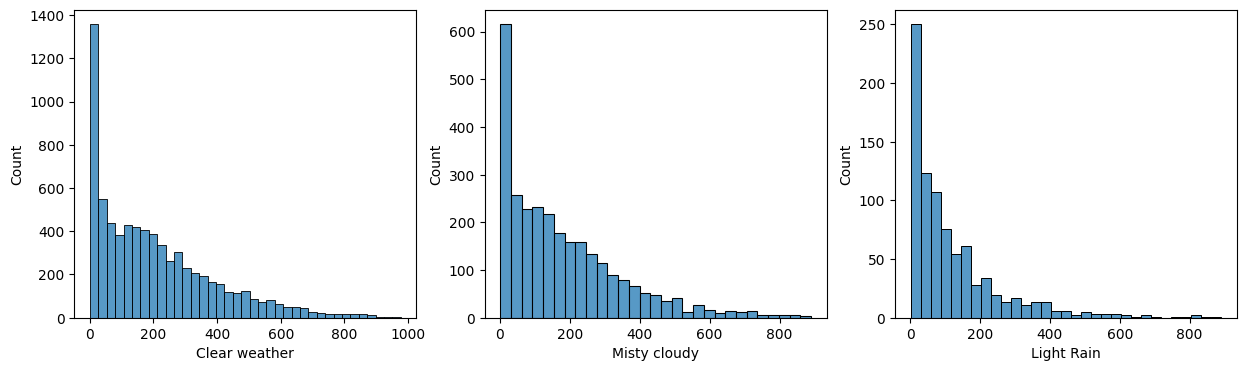

In [ ]:
# Checking normality of all groups

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(prt_cld_clear)
plt.xlabel("Clear weather")
plt.subplot(1,3,2)
sns.histplot(mist_cloudy)
plt.xlabel("Misty cloudy")
plt.subplot(1,3,3)
sns.histplot(rain_snw_thndr)
plt.xlabel("Light Rain")

plt.show()

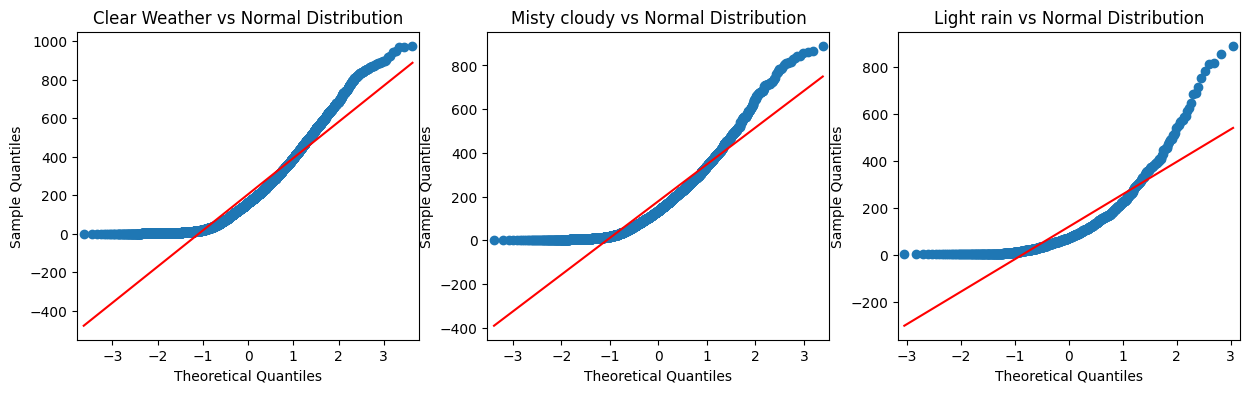

In [ ]:
# Using QQplot

fig,ax=plt.subplots(1,3,figsize=(15,4))
qqplot(prt_cld_clear,line='s',ax=ax[0])
qqplot(mist_cloudy,line='s',ax=ax[1])
qqplot(rain_snw_thndr,line='s',ax=ax[2])
ax[0].set_title('Clear Weather vs Normal Distribution')
ax[1].set_title('Misty cloudy vs Normal Distribution')
ax[2].set_title('Light rain vs Normal Distribution')


fig.show()

As we can see from both the tests that, data is not normal.

Let's confirm through **Shapiro Wilk** test.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Null Hypo: Data is gaussian
# Alternative Hypo: Data is not gaussian

sh_stats,pvalue1=shapiro(prt_cld_clear)
sh_stats,pvalue2=shapiro(mist_cloudy)
sh_stats,pvalue3=shapiro(rain_snw_thndr)
print(f' Clear weather, pvalue: {pvalue1}\n Misty cloudy, pvalue: {pvalue2}\n Light rain, pvalue: {pvalue3}')

 Clear weather, pvalue: 1.5964921477006555e-57
 Misty cloudy, pvalue: 9.777839106111785e-43
 Light rain, pvalue: 3.875893017396149e-33


As we can see pvalue for all three are less than alpha(assumed to be 0.05), we reject the null hypothesis and concludes that data is not gaussian for all 3 samples.

 So if we do the bootstraping, we will be able to conclude that data is Gaussian as per CLT. Thus, lets assume our population distribution to be Gaussian.


---


**Lets check 2nd assumptions of ANOVA here :**

Homogeneity of Variances (Homoscedasticity)
through Levene Test :

In [ ]:
# Null Hypo: Variances are equal
# Alt Hypo: Variance is different for atleast one group
Alpha= 0.05 #(assumed)

lvnstats,pvalue=levene(prt_cld_clear,mist_cloudy,rain_snw_thndr)

if pvalue<alpha:
  print('p value=',pvalue, ', \nReject Null Hypotheis, atleast 1 group have statistically different variance')
else:
  print('p value=',pvalue, ', \nFail to reject Null hypothesis, all data have statisticaly same variances')

p value= 6.198278710731511e-36 , 
Reject Null Hypotheis, atleast 1 group have statistically different variance


The Levene variance test also resulted that variance is different for samples. so that may impact the reliabity of test, which we will confirm by performing the ***Kruskal Wallis*** Test too later.

**3rd Assumption of Anova:**

**Independence:**
Observations within each group are independent of each other. Additionally, the groups themselves are assumed to be independent too.


---

**Steps to ANOVA one way :**
1. NULL HYPOTHESIS(Ho) : Demand for bike rides is same in all weather conditions.

 ALTERNATIVE HYPOTHESIS(Ha) : Demand for rented bike rides is different in atleast one weather condition.
2. F distribution for statistics and assumed Gaussian distribution data.
3. Right tailed test is to be performed as anova is right tail always.
4. Finding pvalue.
5. Let's assume significance level to be 0.05 and compare with pvalue.

In [ ]:
# ANOVA TEST

fstats,pvalue=f_oneway(prt_cld_clear,mist_cloudy,rain_snw_thndr)

alpha=0.05

if pvalue< alpha:
  conclusion ='Reject Null Hypothesis.'
else :
  conclusion = 'Fail to reject Null Hypothesis.'
if conclusion == 'Reject Null Hypothesis.':
  print(f'P value:{pvalue}\n{conclusion}\nThere is effect of weather on demand for rental bikes.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no effect of weather on demand for rental bikes.')

P value:4.976448509904196e-43
Reject Null Hypothesis.
There is effect of weather on demand for rental bikes.


As Anova shows weather has significant effect on bike rentals lets confirm through another test too.

In [ ]:
# KRUSKAL WALLIS TEST
# Ho: No effect of weather on bike rentals
# Ha: atleast 1 weather has significant effect on bike rentals

kruskal(prt_cld_clear,mist_cloudy,rain_snw_thndr)

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

Kruskal too confimed that atleast 1 weather has significant effect on the bike rentals Lets check which group has different effect than other on demand for rented bikes using Ttests.

In [ ]:
# Null hypo: both groups have same effect on demands
# alternative:during clear weather demand is more than mist and cloudy weather

ttest_ind(prt_cld_clear,mist_cloudy,alternative='greater')

TtestResult(statistic=6.488169251217751, pvalue=4.549458108254271e-11, df=10024.0)

In [ ]:
# Null hypo: both groups have same effect on demands
# alternative:during clear weather demand is more than Rain,snow and thunder weather

ttest_ind(prt_cld_clear,rain_snw_thndr,alternative='greater')

TtestResult(statistic=13.05352692528198, pvalue=7.459354885923138e-39, df=8049.0)

In [ ]:
# Null hypo: both groups have same effect on demands
# alternative:during mist cloud weather demand is more than rain, snow thunder

ttest_ind(mist_cloudy,rain_snw_thndr,alternative='greater')

TtestResult(statistic=9.53048112515673, pvalue=1.3729836595136823e-21, df=3691.0)

### **Conclusion :**
As in all 3 above tests the null hypothesis got rejected due to less value than alpha
which is assumed to be 0.05, we can conclude that we have more bike rentals on clear weather day followed by Misty cloudy weather day and then in Light rainwith snow and light thundering weather day.

## Finding out if there any statistical significant difference between the no. of bike rides based on season conditions?

In [ ]:
# Lets separate the sample dataset based on category.

Spring=df[df['season']==1]['count']
Summer=df[df['season']==2]['count']
Autumn=df[df['season']==3]['count']
Winter=df[df['season']==4]['count']

In [ ]:
from scipy.stats import describe
print('Spring season statistics\n',describe(Spring),'\n')
print('Summer season statistics\n',describe(Summer),'\n')
print('Autumn season statistics\n',describe(Autumn),'\n')
print('Winter season statistics\n',describe(Winter),'\n')

Spring season statistics
 DescribeResult(nobs=2686, minmax=(1, 801), mean=116.34326135517499, variance=15693.568533717142, skewness=1.8870013494363214, kurtosis=4.30449666648592) 

Summer season statistics
 DescribeResult(nobs=2733, minmax=(1, 873), mean=215.25137211855105, variance=36867.01182553242, skewness=1.0027135037743604, kurtosis=0.4222412657621657) 

Autumn season statistics
 DescribeResult(nobs=2733, minmax=(1, 977), mean=234.417124039517, variance=38868.517012662865, skewness=0.9909503852121176, kurtosis=0.6959091337333851) 

Winter season statistics
 DescribeResult(nobs=2734, minmax=(1, 948), mean=198.98829553767374, variance=31549.720316669307, skewness=1.1714741534595685, kurtosis=1.2689637849725477) 



- We can see their mean, variance are different, all right skewed and Spring season is leptokurtic while other are platykurtic.
- Lets go ahead with test to check if they are statistically same or different.
As their are more than 2 samples, we can do **ANOVA** test.

**Checking its 1st assumption:**

1. Data to follow **Normal Distribution**

### checking the normality of all groups

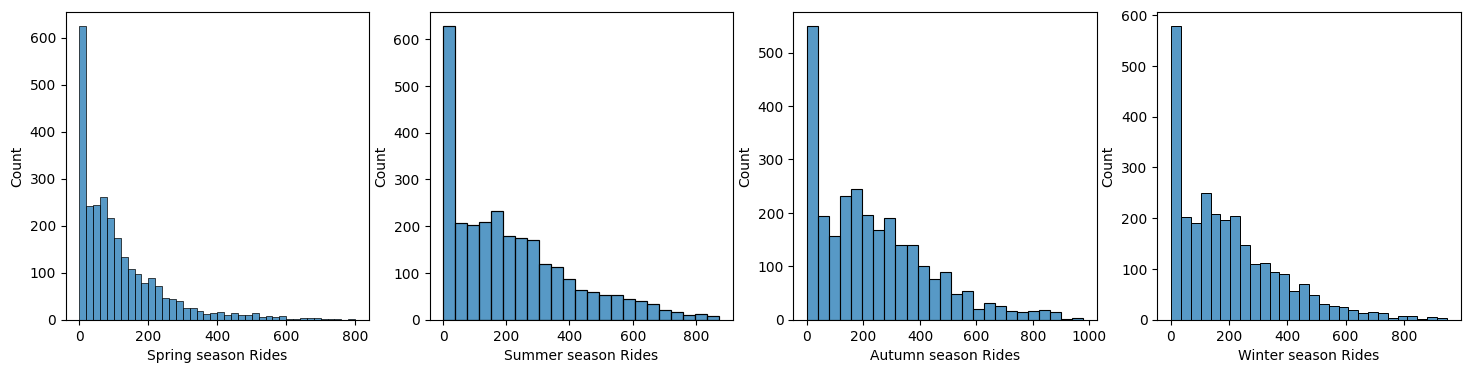

In [ ]:
# Using Visual Method
column=[Spring,Summer,Autumn,Winter]
plt.figure(figsize=(18,4))
i=1
for col in column:
  plt.subplot(1,4,i)
  sns.histplot(col)
  if i==1:
    plt.xlabel("Spring season Rides")
  elif i==2:
    plt.xlabel('Summer season Rides')
  elif i==3:
    plt.xlabel('Autumn season Rides')
  else:
    plt.xlabel('Winter season Rides')
  i+=1
plt.show()

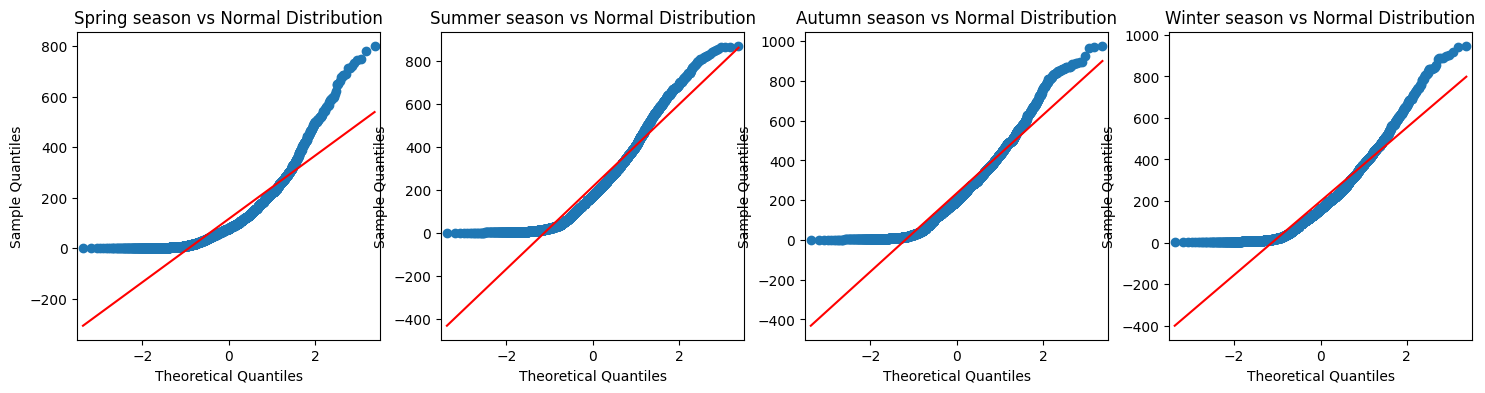

In [ ]:
# Using QQplot

fig,ax=plt.subplots(1,4,figsize=(18,4))
qqplot(Spring,line='s',ax=ax[0])
qqplot(Summer,line='s',ax=ax[1])
qqplot(Autumn,line='s',ax=ax[2])
qqplot(Winter,line='s',ax=ax[3])
ax[0].set_title('Spring season vs Normal Distribution')
ax[1].set_title('Summer season vs Normal Distribution')
ax[2].set_title('Autumn season vs Normal Distribution')
ax[3].set_title('Winter season vs Normal Distribution')

fig.show()

As we can see through both tests that data is not normal lets confirm through Shapiro wilk test too.

In [ ]:
# Null Hypo: Data is gaussian
# Alternative Hypo: Data is not gaussian

sh_stats,pvalue1=shapiro(Spring)
sh_stats,pvalue2=shapiro(Summer)
sh_stats,pvalue3=shapiro(Autumn)
sh_stats,pvalue4=shapiro(Winter)

print(f' Spring season, pvalue: {pvalue1}\n Summer season, pvalue: {pvalue2}\n Autumn season, pvalue: {pvalue3}\n Winter season, pvalue: {pvalue4}')

 Spring season, pvalue: 8.749584618867662e-49
 Summer season, pvalue: 6.039374406270491e-39
 Autumn season, pvalue: 1.043680518918597e-36
 Winter season, pvalue: 1.1299244409282836e-39


As we can see pvalue for all four seasons are less than alpha(assumed to be 0.05), we reject the null hypothesis and concludes that data is not Gaussian for all samples data. So neither of the samples data is Gaussian but we have to check for the distribution of population and not sample as Anova assumption. So if we do the bootstraping, we will be able to conclude that data is Gaussian as per CLT. Thus, lets assume our population distribution to be Gaussian.

Lets check 2nd assumptions of **ANOVA** here :

**Homogeneity of Variances (Homoscedasticity)**

through **Levene Test** :

In [ ]:
# Null Hypo: Variances are equal
# Alt Hypo: Variance is different for atleast one group
Alpha= 0.05 #(assumed)

lvnstats,pvalue=levene(Spring,Summer,Autumn,Winter)

if pvalue<alpha:
  print('p value=',pvalue, ', Reject Null Hypothesis, atleast 1 group have statistically different variance.')
else:
  print('p value=',pvalue, ', Fail to reject Null hypothesis, all data have statisticaly same variance.')

p value= 1.0147116860043298e-118 , Reject Null Hypothesis, atleast 1 group have statistically different variance.


The Levene variance test also resulted that variance is different for samples. so that may impact the reliabity of test, which we will confirm by performing the **Kruskal Wallis Test** too later.

**3rd Assumption of Anova:**

**Independence:**
Observations within each group are independent of each other. Additionally, the groups themselves are assumed to be independent too.


---

**Steps to ANOVA one way :**
1. NULL HYPOTHESIS(Ho) : Demand for bike rides is same in all seasons.

 ALTERNATIVE HYPOTHESIS(Ha) : Demand for rented bike rides is different in atleast one season.

2. F distribution for statistics and assumed Gaussian distribution data.

3. Right tailed test is to be performed as anova is right tail always.

4. Finding pvalue.

5. Let's assume significance level to be 0.05 and compare with pvalue.

In [ ]:
# ANOVA TEST

fstats,pvalue=f_oneway(Spring,Summer,Autumn,Winter)

alpha=0.05
if pvalue< alpha:
  conclusion ='Reject Null Hypothesis.'
else :
  conclusion = 'Fail to reject Null Hypothesis.'
if conclusion == 'Reject Null Hypothesis.':
  print(f'P value:{pvalue}\n{conclusion}\nThere is effect of season on demand for rental bikes.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no effect of season on demand for rental bikes.')

P value:6.164843386499654e-149
Reject Null Hypothesis.
There is effect of season on demand for rental bikes.


As Anova shows season has significant effect on bike rentals lets confirm through another test too.

In [ ]:
# KRUSKAL WALLIS TEST
# Ho: No effect of season on bike rentals
# Ha: atleast 1 season has significant effect on bike rentals

kruskal(Spring,Summer,Autumn,Winter)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

Kruskal too confimed that atleast one season has significant effect on the bike rentals Lets check which group has different effect than other on demand for rented bikes using Ttests.

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during spring season demand is less compared to summer season

ttest_ind(Spring,Summer,alternative='less')

TtestResult(statistic=-22.41673852194779, pvalue=8.289293670200048e-107, df=5417.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during spring season demand is less compared to Autumn season

ttest_ind(Spring,Autumn,alternative='less')

TtestResult(statistic=-26.262602569974415, pvalue=1.7019252177655485e-143, df=5417.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during spring season demand is less compared to Winter season

ttest_ind(Spring,Winter,alternative='less')

TtestResult(statistic=-19.763761227758852, pvalue=2.618208714533391e-84, df=5418.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during Summer season demand is less compared to Autumn season

ttest_ind(Summer,Autumn,alternative='less')

TtestResult(statistic=-3.6407918229052068, pvalue=0.00013715780586249322, df=5464.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during Summer season demand is less compared to Winter season

ttest_ind(Summer,Winter,alternative='less')

TtestResult(statistic=3.2507544346007022, pvalue=0.9994210159152934, df=5465.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during Summer season demand is greater compared to Winter season

ttest_ind(Autumn,Winter,alternative='greater')

TtestResult(statistic=6.980360925184712, pvalue=1.6471798336237476e-12, df=5465.0)

**Conclusion :**
- First 3 ttests concluded to reject null hypothesis and proved that in Spring season the bike renting is least.
- Next 3 ttests indicates Summer has less rentings than Autumn but more than Winter.
- Last ttest concluded that Autumn season has higher rentings from Winter season too.
- From all above ttests we concluded that due to less pvalue than alpha which is assumed to be 0.05, we can say that we have more bike rentals during Autumn season followed by Summer, Winter and Spring season.

## Finding out if weather conditions are significantly different during different seasons

As both the variables are categorial, here performing CHISQUARE TEST to check the assosciation of season and weather.

In [ ]:
# creating contingency table to perform test

data = pd.crosstab(df['weather'], df['season'], margins=True)
data

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


As chisquare is a non parametric test, the assumptions are very few and all are getting satisfied here too.

**Assumptions of CHISQUARE TEST:**

1. Both variables are categorical.
2. All observations are independent.
3. Cells in the contingency table are mutually exclusive.
4. Expected value of cells should be 5 or greater in at least 80% of cells.
5. Lets take the significance value to be 0.05.

In [ ]:
# Performing chisquare test

# H0 : Weather and Season are not assosciated with each other
# Ha : Weather and Season are strongly assosciated with each other

alpha=0.05

chi2,pvalue,_,_=chi2_contingency(data)

if pvalue< alpha:
  conclusion ='Reject Null Hypothesis'
else :
  conclusion = 'Fail to reject Null Hypothesis'
if conclusion == 'Reject Null Hypothesis':
  print(f'P value: {pvalue}\n{conclusion}\nThere is strong association between weather and season.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no significant association between weather and season.')

P value: 3.1185273325126814e-05
Reject Null Hypothesis
There is strong association between weather and season.


As we can see there is a category of season during which a single data point is given. Lets check if it has some effect on reliabilty of chisquare

In [ ]:
# H0 : Weather and Season are not assosciated with each other
# Ha : Weather and Season are strongly assosciated with each other

alpha=0.05

chistat,pvalue,_,_=chi2_contingency(data[:3])
if pvalue< alpha:
  conclusion ='Reject Null Hypothesis'
else :
  conclusion = 'Fail to reject Null Hypothesis'
if conclusion == 'Reject Null Hypothesis':
  print(f'P value: {pvalue}\n{conclusion}\nThere is strong association between weather and season.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no significant association between weather and season.')

P value: 2.27372487311126e-07
Reject Null Hypothesis
There is strong association between weather and season.


## **Conclusion :**
- The p-value for chi-square test with extreme weather is extremely low and same when data of extreme weather is excluded, though the p-value decreased much more when extreme weather is excluded.
- We can conclude that both weather and season are dependent on each other as we already know that when the weather is clear and season is Autumn or Summer, the bikes are rented the most.
- As the variables are not independent we can't perform two way anova to test their collective effect on bike renting which would be a great analysis if found.


---



# **Summary :**

- Its observed that whenever there is Clear, Few clouds, partly cloudy the bike rental is more in comparison to other weather conditions. 66 % of rentals happened when weather is Clear, Few clouds, partly cloudy.
- Whenever there is heavy rain, thunderstorm, snow or fog, there were very few, negligible bikes were rented.
- Working days have not much effect on casual users but on registered users who rented almost 3 times more bikes during working days.
- Negligible demand during midnight hours.
- Casual users rented more during Fall and summer which reduced during Winter and the least during Spring season.
- Registered users rented almost same during Fall, Summer and Winter but least during Spring season.
- Renting decrease when temperature starts dipping below 7°-8° C or when humidity start increasing too much or below 20.
- Based on hypothesis testing, working and non working day does not have effect on bike rentings.
- Based on hypothesis testing ,weather and season do have effects on the bike rentals.
- Season and weather are strongly associated with each other.